# 1) Class rebalancing

I've generated a sample dataset with a severe class imbalance for you to load, classify, and perform class rebalancing.

Load the both the train and validation sets by uploading the files as in previous problem sets. **I have already split the data between train and validation, so you do not need to split either dataset (you also won't need a test set here).**

In [ ]:
### for importing datasets from csv files

from google.colab import files
import io
import numpy as np
import pandas as pd

In [ ]:
# upload train.csv
uploaded = files.upload()

df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

x_1 = np.expand_dims(df.x_1.to_numpy(), -1)
x_2 = np.expand_dims(df.x_2.to_numpy(), -1)
X_train = np.append(x_1, x_2, axis=1)
y_train = np.expand_dims(df.y.to_numpy(), -1)

Saving train.csv to train (2).csv


In [ ]:
# upload val.csv
uploaded = files.upload()

df = pd.read_csv(io.StringIO(uploaded['val.csv'].decode('utf-8')))

x_1 = np.expand_dims(df.x_1.to_numpy(), -1)
x_2 = np.expand_dims(df.x_2.to_numpy(), -1)
X_val = np.append(x_1, x_2, axis=1)
y_val = np.expand_dims(df.y.to_numpy(), -1)

Saving val.csv to val (2).csv


Make a scatterplot of the training dataset. Use either a different marker or color to show the different classes. You can use a similar trick as we did in k-means clustering to select the rows of the dataset matrix where the label is equal to a given value (or similar to coloring the scatterplot in the California housing dataset). Make sure to modify the alpha parameter to see the data better. Use proper aspect ratio, labels, legends, etc. Feel free to print datasets and shapes so that you understand the form of the data.

In [ ]:
X_train

array([[ 1.95168101,  1.23701256],
       [-0.45886967,  3.3872195 ],
       [ 1.22362536,  4.61493359],
       ...,
       [-0.18346618,  1.02167767],
       [-0.51873262,  0.39331545],
       [-1.22654594, -1.48797623]])

Text(0, 0.5, 'Y')

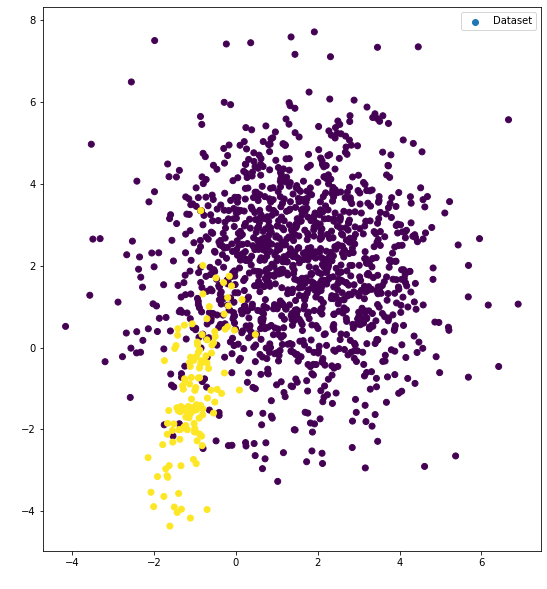

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10,10))
axes = plt.gca()
axes.set_aspect('equal')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,label="Dataset")
plt.legend()
plt.xlabel('X', c='w')
plt.ylabel('Y', c='w')

Using scikit-learn's [`LogisticRegression` model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), build a logistic regression model. Using parameters of the model class, specify that our decision boundary should fit an intercept (see documentation; this will take the place of the column of ones we used to add to the dataset). Using only the training data, fit the logistic regression model. 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

With the model now fit to the training data do not run any predictions yet. Make a scatterplot of the validation dataset, again using either a different marker or color to show the different classes. Using the parameters of the model (intercept and coefficients attributes), plot the decision boundary on top of the scatterplot. Remember the decision boundary is exact set of points where $\theta^T x = 0$. If you expand this equation out (making sure you have the intercept term), you can rearrange for $x_2$ and then plot $x_2$ as a function of $x_1$ and this will be your decision boundary. Use proper aspect ratio, labels, legends, etc. 

Text(0, 0.5, 'Y')

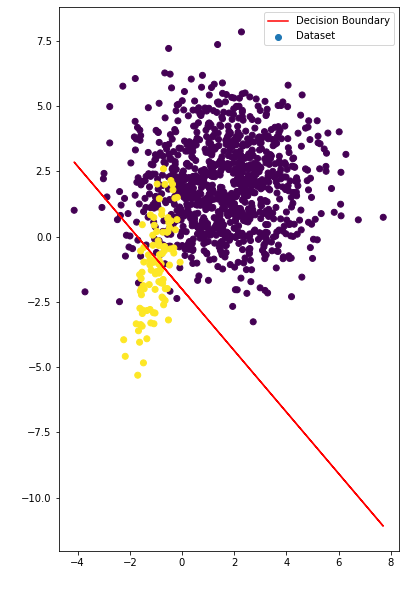

In [ ]:
figure_1 = plt.figure(figsize=(10,10))
axes_1 = plt.gca()
axes_1.set_aspect('equal')
plt.scatter(X_val[:,0],X_val[:,1],c=y_val,label="Dataset")
x = X_val[:,0]
y = (0 - lr_model.intercept_[0] - lr_model.coef_[0][0]*X_val[:,0])/(lr_model.coef_[0][1])
plt.plot(x, y, c='r',label='Decision Boundary')
plt.legend()
plt.xlabel('X', c='w')
plt.ylabel('Y', c='w')

Now, using your model, compute predictions using the validation dataset. Using the true validation labels and the predicted validation labels, compute the accuracy, accuracy on class 0, accuracy on class 1, and the balanced accuracy.

In [ ]:
from sklearn.metrics import confusion_matrix
y_val_predict = lr_model.predict(X_val)
cm = confusion_matrix(y_val, y_val_predict)
tn, fp, fn, tp = cm.ravel()
a0 = (tn*100)/(tn+fp)
a1 = (tp*100)/(tp+fn)
a = lr_model.score(X_val, y_val)*100
print("The accuracy for class 0 is %.2f" %a0)
print("The accuracy for class 1 is %.2f" %a1)
print("The accuracy for the model is %.2f" %a)

The accuracy for class 0 is 98.50
The accuracy for class 1 is 57.00
The accuracy for the model is 94.73


You'll now do class rebalancing/reweighting. Make a new `LogisticRegression` model with similar parameters, but specifically set the `class_weight` parameter to `"balanced"`. This will re-weight your classes. You can optionally not update this parameter and replicate the minority class examples in the training dataset as we showed in lecture. Using only the training data, fit the new logistic regression model.

In [ ]:
lr_model_reweighted = LogisticRegression(class_weight='balanced')

With the model now fit to the training data do not run any predictions yet. Again, make a scatterplot of the validation dataset. Using the parameters of the model (intercept and coefficients attributes), plot the decision boundary on top of the scatterplot. Use proper aspect ratio, labels, legends, etc. 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Y')

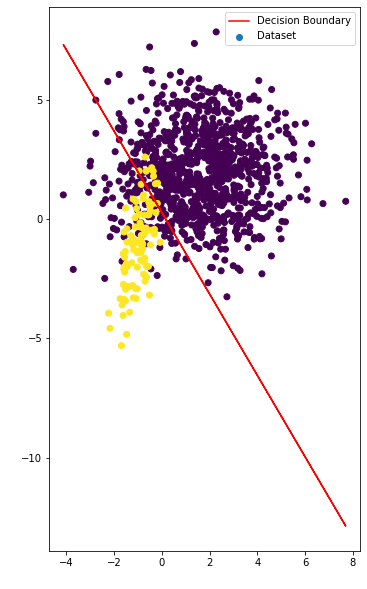

In [ ]:
lr_model_reweighted.fit(X_train, y_train)
figure_2 = plt.figure(figsize=(10,10))
axes_2 = plt.gca()
axes_2.set_aspect('equal')
plt.scatter(X_val[:,0],X_val[:,1],c=y_val,label="Dataset")
x_ = X_val[:,0]
y_ = (0 - lr_model_reweighted.intercept_[0] - lr_model_reweighted.coef_[0][0]*X_val[:,0])/(lr_model_reweighted.coef_[0][1])
plt.plot(x_, y_, c='r',label='Decision Boundary')
plt.legend()
plt.xlabel('X', c='w')
plt.ylabel('Y', c='w')

Finally, using the new model, compute predictions using the validation dataset. Using the true validation labels and the predicted validation labels, compute the accuracy, accuracy on class 0, accuracy on class 1, and the balanced accuracy. Compare these numbers with the previous model results to see how the classification metrics have changed due to class rebalancing/reweighting.

In [ ]:
y_val_predict_ = lr_model_reweighted.predict(X_val)
cm_ = confusion_matrix(y_val, y_val_predict_)
tn_, fp_, fn_, tp_ = cm_.ravel()
a0_ = (tn_*100)/(tn_+fp_)
a1_ = (tp_*100)/(tp_+fn_)
a_ = lr_model_reweighted.score(X_val, y_val)*100
print("The accuracy for class 0 is %.2f" %a0_)
print("The accuracy for class 1 is %.2f" %a1_)
print("The accuracy for the model is %.2f" %a_)

The accuracy for class 0 is 89.90
The accuracy for class 1 is 91.00
The accuracy for the model is 90.00


###Comparison

Despite a decrease in accuracy for class 0 and the total accuracy of the model, there has been a significantly high increase in the accuracy of class 1 therefore balancing out the bias from the previous model and making it more suitable for real world applications.


---



You can explore different classifiers below, with or without class rebalancing/reweighting.

In [ ]:
#Using Support Vector Classification
from sklearn import svm
#Without balancing
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
yhat = svm_model.predict(X_val)
cm = confusion_matrix(y_val, yhat)
tn, fp, fn, tp = cm.ravel()
a0 = (tn*100)/(tn+fp)
a1 = (tp*100)/(tp+fn)
a = svm_model.score(X_val, y_val)*100
print("The accuracy for class 0 is %.2f" %a0)
print("The accuracy for class 1 is %.2f" %a1)
print("The accuracy for the model is %.2f" %a)

The accuracy for class 0 is 98.50
The accuracy for class 1 is 70.00
The accuracy for the model is 95.91


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#With balancing
svm_model = svm.SVC(class_weight='balanced')
svm_model.fit(X_train, y_train)
yhat = svm_model.predict(X_val)
cm = confusion_matrix(y_val, yhat)
tn, fp, fn, tp = cm.ravel()
a0 = (tn*100)/(tn+fp)
a1 = (tp*100)/(tp+fn)
a = svm_model.score(X_val, y_val)*100
print("The accuracy for class 0 is %.2f" %a0)
print("The accuracy for class 1 is %.2f" %a1)
print("The accuracy for the model is %.2f" %a)

The accuracy for class 0 is 91.60
The accuracy for class 1 is 94.00
The accuracy for the model is 91.82


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Comparison between models

Clearly, the model using SVC (Support Vector Classification) is better than the one using Logistic Regression.

In [ ]:
#Using decision trees 
from sklearn.tree import DecisionTreeClassifier
Tree2 = DecisionTreeClassifier(criterion="entropy", max_depth = 2, class_weight='balanced')
Tree2.fit(X_train, y_train)
predTree2 = Tree2.predict(X_val)
cm = confusion_matrix(y_val, predTree2)
tn, fp, fn, tp = cm.ravel()
a0_p1 = (tn*100)/(tn+fp)
a1_p1 = (tp*100)/(tp+fn)
a_p1 = Tree2.score(X_val, y_val)*100
print("The accuracy for class 0 is %.2f" %a0_p1)
print("The accuracy for class 1 is %.2f" %a1_p1)
print("The accuracy for the model is %.2f" %a_p1)

The accuracy for class 0 is 95.70
The accuracy for class 1 is 83.00
The accuracy for the model is 94.55


In [ ]:
Tree3 = DecisionTreeClassifier(criterion="entropy", max_depth = 3, class_weight='balanced')
Tree3.fit(X_train, y_train)
predTree3 = Tree3.predict(X_val)
cm = confusion_matrix(y_val, predTree3)
tn, fp, fn, tp = cm.ravel()
a0_p2 = (tn*100)/(tn+fp)
a1_p2 = (tp*100)/(tp+fn)
a_p2 = Tree3.score(X_val, y_val)*100
print("The accuracy for class 0 is %.2f" %a0_p2)
print("The accuracy for class 1 is %.2f" %a1_p2)
print("The accuracy for the model is %.2f" %a_p2)

The accuracy for class 0 is 89.10
The accuracy for class 1 is 97.00
The accuracy for the model is 89.82


In [ ]:
Tree4 = DecisionTreeClassifier(criterion="entropy", max_depth = 4, class_weight='balanced')
Tree4.fit(X_train, y_train)
predTree4 = Tree4.predict(X_val)
cm = confusion_matrix(y_val, predTree4)
tn, fp, fn, tp = cm.ravel()
a0_p3 = (tn*100)/(tn+fp)
a1_p3 = (tp*100)/(tp+fn)
a_p3 = Tree4.score(X_val, y_val)*100
print("The accuracy for class 0 is %.2f" %a0_p3)
print("The accuracy for class 1 is %.2f" %a1_p3)
print("The accuracy for the model is %.2f" %a_p3)

The accuracy for class 0 is 92.20
The accuracy for class 1 is 93.00
The accuracy for the model is 92.27


In [ ]:
Tree5 = DecisionTreeClassifier(criterion="entropy", max_depth = 5, class_weight='balanced')
Tree5.fit(X_train, y_train)
predTree5 = Tree5.predict(X_val)
cm = confusion_matrix(y_val, predTree5)
tn, fp, fn, tp = cm.ravel()
a0_p4 = (tn*100)/(tn+fp)
a1_p4 = (tp*100)/(tp+fn)
a_p4 = Tree5.score(X_val, y_val)*100
print("The accuracy for class 0 is %.2f" %a0_p4)
print("The accuracy for class 1 is %.2f" %a1_p4)
print("The accuracy for the model is %.2f" %a_p4)

The accuracy for class 0 is 92.40
The accuracy for class 1 is 93.00
The accuracy for the model is 92.45


In [ ]:
Tree6 = DecisionTreeClassifier(criterion="entropy", max_depth = 6, class_weight='balanced')
Tree6.fit(X_train, y_train)
predTree6 = Tree6.predict(X_val)
cm = confusion_matrix(y_val, predTree6)
tn, fp, fn, tp = cm.ravel()
a0_p5 = (tn*100)/(tn+fp)
a1_p5 = (tp*100)/(tp+fn)
a_p5 = Tree6.score(X_val, y_val)*100
print("The accuracy for class 0 is %.2f" %a0_p5)
print("The accuracy for class 1 is %.2f" %a1_p5)
print("The accuracy for the model is %.2f" %a_p5)

The accuracy for class 0 is 93.30
The accuracy for class 1 is 91.00
The accuracy for the model is 93.09


In [ ]:
Tree7 = DecisionTreeClassifier(criterion="entropy", max_depth = 7, class_weight='balanced')
Tree7.fit(X_train, y_train)
predTree7 = Tree7.predict(X_val)
cm = confusion_matrix(y_val, predTree7)
tn, fp, fn, tp = cm.ravel()
a0_p6 = (tn*100)/(tn+fp)
a1_p6 = (tp*100)/(tp+fn)
a_p6 = Tree7.score(X_val, y_val)*100
print("The accuracy for class 0 is %.2f" %a0_p6)
print("The accuracy for class 1 is %.2f" %a1_p6)
print("The accuracy for the model is %.2f" %a_p6)

The accuracy for class 0 is 95.20
The accuracy for class 1 is 77.00
The accuracy for the model is 93.55


Text(0, 0.5, 'Accuracy')

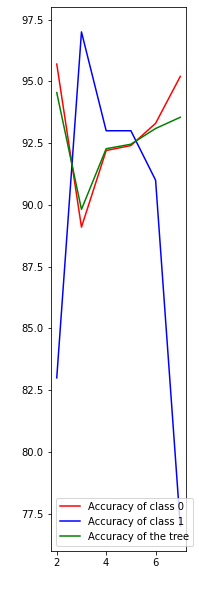

In [ ]:
figure_2 = plt.figure(figsize=(10,10))
axes_2 = plt.gca()
axes_2.set_aspect('equal')
x_list = [2,3,4,5,6,7]
a0_list = [a0_p1,a0_p2,a0_p3,a0_p4,a0_p5,a0_p6]
a1_list = [a1_p1,a1_p2,a1_p3,a1_p4,a1_p5,a1_p6]
a_list = [a_p1,a_p2,a_p3,a_p4,a_p5,a_p6]
axes_2.plot(x_list, a0_list, c='r',label="Accuracy of class 0")
axes_2.plot(x_list, a1_list, c='b',label="Accuracy of class 1")
axes_2.plot(x_list, a_list, c='g',label="Accuracy of the tree")
axes_2.legend(loc='lower left')
plt.xlabel('Max Depth', c='w')
plt.ylabel('Accuracy', c='w')

As per the above the diagram, the preferable tree would to use would be the one with maximum depth of 5 as it has relatively high accuracy of clas 0 and 1 which means that there is no bias and the accuracy is the greatest for the classes and the model itself.